In [1]:
import numpy as np
import pdb
import matplotlib.pylab as plt
import re
from astropy.io import fits
import subprocess
import os
import sys
# runpm.py has code to run gfaproc and process the output to get just the good sequences 
from runpm import *

See gfaproctests notebook for how to update the comm.par files for a fresh copy of the data 

In [2]:
os.environ['DESI_DIR']='/project/projectdirs/desi/users/skent/plate/desi'

In [3]:
pwd()

'/global/u2/c/crockosi/platemaker'

First set up environment variables and path<br>
Don't use sys.path.insert, that does not get inherited by the subprocess.

In [7]:
os.environ['DATADIR']='/project/projectdirs/desi/spectro/data'
os.environ['PMDIR']='test_gfaproc_astrom_20190815'
os.environ['DESI_DIR']='/project/projectdirs/desi/users/skent/plate/desi'
os.environ['KENTOOLS_DIR']='/project/projectdirs/desi/users/skent/plate/kentools'
os.environ['DES_DIR']='/project/projectdirs/desi/users/skent/plate/des'
os.environ['DERVISH_STARTUP']='/global/project/projectdirs/desi/users/skent/plate/dervish/etc/dervishStartup.tcl'
os.environ['DERVISH_DIR']='/global/project/projectdirs/desi/users/skent/plate/dervish'
os.environ['ASTROTOOLS_STARTUP']='/project/projectdirs/desi/users/skent/products/astrotools-123513/etc/astrotoolsStartup.tcl'
os.environ['ASTROTOOLS_DIR']='/project/projectdirs/desi/users/skent/products/astrotools-123513'
os.environ['IMG_STARTUP']='/project/projectdirs/desi/users/skent/plate/desi/etc/init.tcl'

In [5]:
os.environ['PATH'] = os.environ['DATADIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['PMDIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['DESI_DIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['KENTOOLS_DIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['DES_DIR']+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/plate/desi/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/plate/des/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/plate/kentools/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/fpack-141/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/ds9/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/fftw-123513/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/xpa-2.1.13/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/tcl-8.4.11/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/global/project/projectdirs/desi/users/skent/plate/sdsstools/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/pgplot-123513/bin'+':'+os.environ['PATH']

In [12]:
pwd()

'/global/u2/c/crockosi/platemaker/test'

In [8]:
successlist,fewmatchlist,badpointinglist,nomatchlist,missinghdulist,missinghduerrlist,badimagelist,badnfsproclist,otherlist = sortgfaprocout()

In [9]:
len(successlist)

402

from gfaproctests notebook, sequences that have 0 field rotation: 13046,13138,13146

In [13]:
os.chdir('..')

The next few cells test the recipe for running the gfaproc analysis on the individual guider frames from a guider cube after running PM's guideSplit code to split the cube into frames.<br>
It starts after the recipe was tested on the command line on guider files 0-4. 

In [10]:
#os.chdir('test/13146')

In [14]:
#cmdstr1 = 'confignext '+ '13146'

In [15]:
#oneout = subprocess.run(cmdstr1,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)

In [19]:
#configval = np.int(oneout.stdout)

In [25]:
#str(configval).format(':%d')

'11'

In [35]:
#guideval= 5

In [36]:
#seqid = '13146'

In [37]:
#cmdstr2 = 'cp guide-'+seqid+'-'+str(guideval).format(':%d')+'.fits gfa-'+seqid+'.'+str(configval-1).format(':%d')+'.fits'

In [38]:
#cmdstr2

'cp guide-13146-5.fits gfa-13146.10.fits'

rungfaprocguidercube assumes you have run guideSplit to make a guider cube into a list of files: <br>
For seqid 13146, they would be guide-13146-0.fits through guide-13146-N.fits where N is the number of guide exposures. Exposure 0 is the acquisition image. <br>
seqid is a string<br>
nguideframes is the number of guider frames into which the cube was split.  This code could be more clever and not need to have that as an argument.<br>
For each guider frame, run confignext then gfaproc. <br>
confignext will keep track of the numbering.

In [14]:
def rungfaprocguidercube(seqid, nguideframes, istart=0):
    os.chdir(seqid)
    for guideval in range(istart,nguideframes):
        # run confighext
        cmdstr1 = 'confignext ' + seqid
        oneout = subprocess.run(cmdstr1,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if oneout.returncode > 0:
            print('ERROR comfignext '+seqid + ' '+cmdstr1)
            os.chdir('..')
            continue
        configval = np.int(oneout.stdout)
        # now copy guider file to a gfaproc file
        cmdstr2 = 'cp guide-'+seqid+'-'+str(guideval).format(':%d')+'.fits gfa-'+seqid+'.'+str(configval-1).format(':%d')+'.fits'
        twoout = subprocess.run(cmdstr2,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if twoout.returncode > 0:
            print('ERROR guide copy '+seqid)
            os.chdir('..')
            continue
        cmdstr3 = 'gfaproc ' + seqid
        threeout = subprocess.run(cmdstr3,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if threeout.returncode > 0:
            print('ERROR gfaproc '+seqid)
    os.chdir('..')

In [15]:
pwd()

'/global/u2/c/crockosi/platemaker'

In [52]:
os.chdir('..')

In [73]:
rungfaprocguidercube('13146',53)

In [16]:
# read set of gfaproc outputs run on guider frames
# configstart is the first gfaproc.out file to read. 5 is usualy the first reprocess
# note if you re-ran gfaproc and then ran on the guide cube you ran on the acquisition 
# image twice.  start at configstart=6 unless you want to re-analyze the gfaproc outout
# twice, in which case you need to loop to nguideframes+1 below
def readguidergfaprocs(seqid, nguideframes,configstart=5):
    os.chdir(seqid)
    scalelist = []
    # field rotation degrees
    rotlist = []
    # rms x,y in arcsec
    rmsxlist = []
    rmsylist = []
    halist = []
    declist = []
    zdlist = []
    paranglelist = []
    maxlist = []
    # pointing corrections in ra,dec in arcsec
    raofflist = []
    decofflist = []
    # read output of nfsproc
    nfsname = 'nfs-' + seqid + '.2.par'
    nfsdict = {}
    with open(nfsname) as nfsf:
        for nline in nfsf:
            llist = nline.split()
            if re.search('#',llist[0]) != None:
                continue
            ikey = llist[0]
            if ikey in ['raBore','decBore','zd','psi','ha','exptime','mjd','yr','mon','day','spectime']:
                nfsdict[ikey] = np.double(llist[1])
    # get all gfaproc.out files
    alllist = os.listdir()
    gfaoutlist = []
    # go to nguideframes because we re-read the first reprocess. it should be
    # identical to the reprocess of guide file 0, which will be the second gfaproc out
    # file read in this scheme
    for i in range(configstart,configstart+nguideframes):
        gfaprocfile = 'gfaproc-'+seqid+'.'+str(i).format(':%d')+'.out'
        with open(gfaprocfile) as matchf:
            for matchl in matchf:
                llist = matchl.split()
                if len(llist) < 1:
                    continue
                if (re.match('scale',llist[0]) != None):
                    if ((re.match('correction',llist[1])!= None) & (len(llist) > 6)):
                        scale = float(llist[2])
                        # add rotation zero point from comm.par file 
                        #rotation = float(llist[5]) + float(llist[9])
                        # no, don't do that
                        rotation = float(llist[5])
                if ((re.match('rmsx',llist[0]) != None) & (len(llist) > 4)):
                    if (re.match('arcsec',llist[4])!= None):
                        rmsx = float(llist[1])
                        rmsy = float(llist[3])
                if (re.match('Pointing',llist[0]) != None):
                    raoffall = llist[5]
                    raoff = float(re.search('([-0-9.]+)(\,$)',raoffall).group(1))
                    decoff = float(llist[8])
        scalelist.append(scale)
        rotlist.append(rotation)
        rmsxlist.append(rmsx)
        rmsylist.append(rmsy)
        halist.append(nfsdict['ha'])
        declist.append(nfsdict['decBore'])
        zdlist.append(nfsdict['zd'])
        paranglelist.append(nfsdict['psi'])
        raofflist.append(raoff)
        decofflist.append(decoff)
    scalelist = np.asarray(scalelist)
    rotlist = np.asarray(rotlist)
    rmsxlist = np.asarray(rmsxlist)
    rmsylist = np.asarray(rmsylist)
    halist = np.asarray(halist)
    declist = np.asarray(declist)
    zdlist = np.asarray(zdlist)
    paranglelist = np.asarray(paranglelist)
    raofflist = np.asarray(raofflist)
    decofflist = np.asarray(decofflist)
    os.chdir('..')
    return scalelist,rotlist,rmsxlist,rmsylist,halist,declist,zdlist,paranglelist,raofflist,decofflist

        
        
        

In [17]:
pwd()

'/global/u2/c/crockosi/platemaker'

In [18]:
os.chdir('test')

In [20]:
scalelist,rotlist,rmsxlist,rmsylist,halist,declist,zdlist,paranglelist,raofflist,decofflist=readguidergfaprocs('13146', 53)


In [21]:
len(scalelist)

53

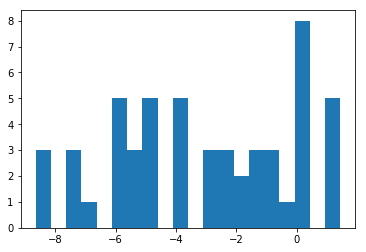

In [22]:
a,b,c = plt.hist(rotlist*3600,bins=20)

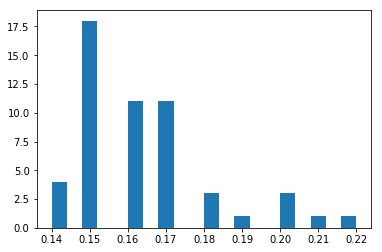

In [23]:
a,b,c = plt.hist(rmsxlist,bins=20)

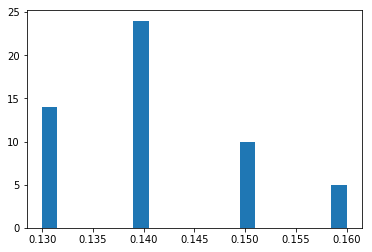

In [24]:
a,b,c = plt.hist(rmsylist,bins=20)

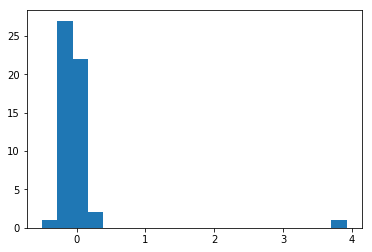

In [25]:
a,b,c = plt.hist(raofflist,bins=20)

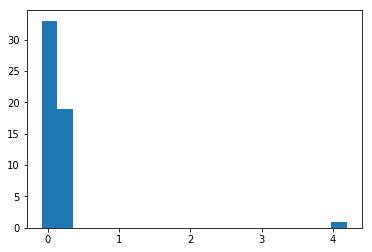

In [29]:
a,b,c = plt.hist(decofflist,bins=20)

The outliers in the two plots above are the acquisition image in guider frame 0, before the pointing offset. 

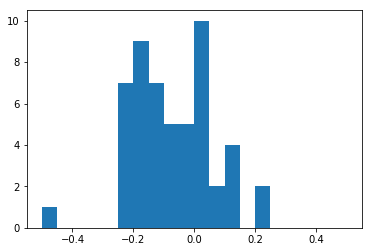

In [30]:
a,b,c = plt.hist(raofflist,bins=20,range=[-0.5,0.5])

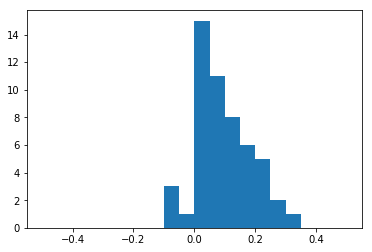

In [31]:
a,b,c = plt.hist(decofflist,bins=20,range=[-0.5,0.5])

Now plot the offset vs. time as measured by PM. This should match the guider offsets in the ICS output, but it will not quite because of the way guide stars are weighted. 

Big initial offset is for the acquisiton image again.

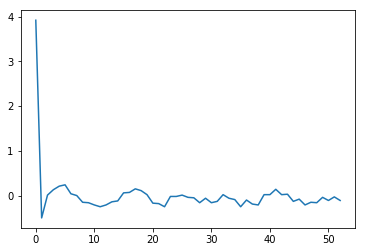

In [33]:
plt.plot(raofflist)

(-0.5, 0.5)

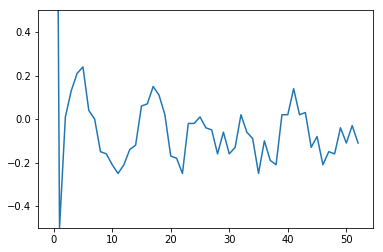

In [34]:
plt.plot(raofflist)
plt.ylim(-0.5,0.5)

In [35]:
raofflist[0:5]

array([ 3.92, -0.5 ,  0.01,  0.13,  0.21])

In [36]:
decofflist[0:5]

array([ 4.19, -0.  ,  0.17,  0.19,  0.17])

In [37]:
np.mean(raofflist[1:])

-0.069230769230769221

In [38]:
np.mean(decofflist[1:])

0.099999999999999992

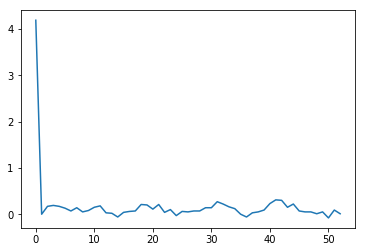

In [39]:
plt.plot(decofflist)

(-0.1, 0.35)

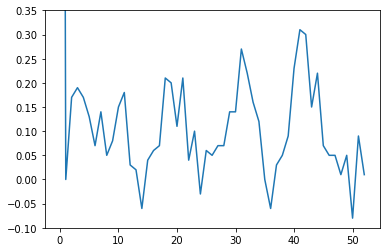

In [40]:
plt.plot(decofflist)
plt.ylim(-0.1,0.35)